In [1]:
#load packages
library(tidyverse)
library(reshape2)
library(caret)
theme_set(theme_bw())

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



### Read in Files 

In [2]:
df_autism_X <- read_csv("../data/clean-data/Xtrain-clean-autism-screening.csv")
df_autism_y <- read_csv("../data/clean-data/ytrain-clean-autism-screening.csv")
# df_autism_train <- read_csv("..data/autism_screening_children_X_train.csv")

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  .default = col_double(),
  gender = col_character(),
  ethnicity = col_character(),
  jaundice = col_character(),
  country_of_res = col_character(),
  used_app_before = col_character(),
  age_desc = col_character(),
  relation = col_character(),
  `Class/ASD` = col_character()
)
See spec(...) for full column specifications.
Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_double(),
  autism = col_character()
)


In [3]:
df_autism_y$X1 <- NULL
df_autism <- cbind(df_autism_X, df_autism_y)

## Clean Names

In [4]:
names(df_autism) <- make.names(names(df_autism))

In [5]:
str(df_autism)

'data.frame':	712 obs. of  22 variables:
 $ X1             : num  245 393 275 199 837 547 466 313 999 13 ...
 $ A1_Score       : num  1 1 1 1 1 0 1 1 1 1 ...
 $ A2_Score       : num  1 0 0 0 0 1 1 1 0 0 ...
 $ A3_Score       : num  1 0 1 0 1 1 0 1 0 0 ...
 $ A4_Score       : num  0 1 1 0 0 1 0 1 0 0 ...
 $ A5_Score       : num  0 1 0 1 0 1 0 0 0 0 ...
 $ A6_Score       : num  1 1 0 0 0 0 0 1 0 0 ...
 $ A7_Score       : num  0 1 0 1 0 1 1 1 0 1 ...
 $ A8_Score       : num  1 1 0 0 0 1 1 1 1 0 ...
 $ A9_Score       : num  0 1 1 0 0 0 0 1 0 0 ...
 $ A10_Score      : num  1 1 0 1 0 1 1 1 0 0 ...
 $ age            : num  5 12 6 9 22 23 29 14 29 4 ...
 $ gender         : chr  "m" "f" "m" "m" ...
 $ ethnicity      : chr  "Middle Eastern" "White-European" "Asian" "White-European" ...
 $ jaundice       : chr  "no" "no" "no" "no" ...
 $ country_of_res : chr  "Jordan" "United Kingdom" "India" "Australia" ...
 $ used_app_before: chr  "no" "no" "no" "no" ...
 $ result         : num  6 8 4 4 2 7 5 9

In [6]:
df_autism$gender <- as.factor(df_autism$gender)
df_autism$jaundice <- as.factor(df_autism$jaundice)
df_autism$autism <- as.factor(df_autism$autism)
df_autism$Class.ASD <- tolower(df_autism[[21]])
df_autism$Class.ASD <- as.factor(df_autism$Class.ASD)

### Make a plot

In [7]:
a_score <- c('A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score')



Saving 7 x 7 in image


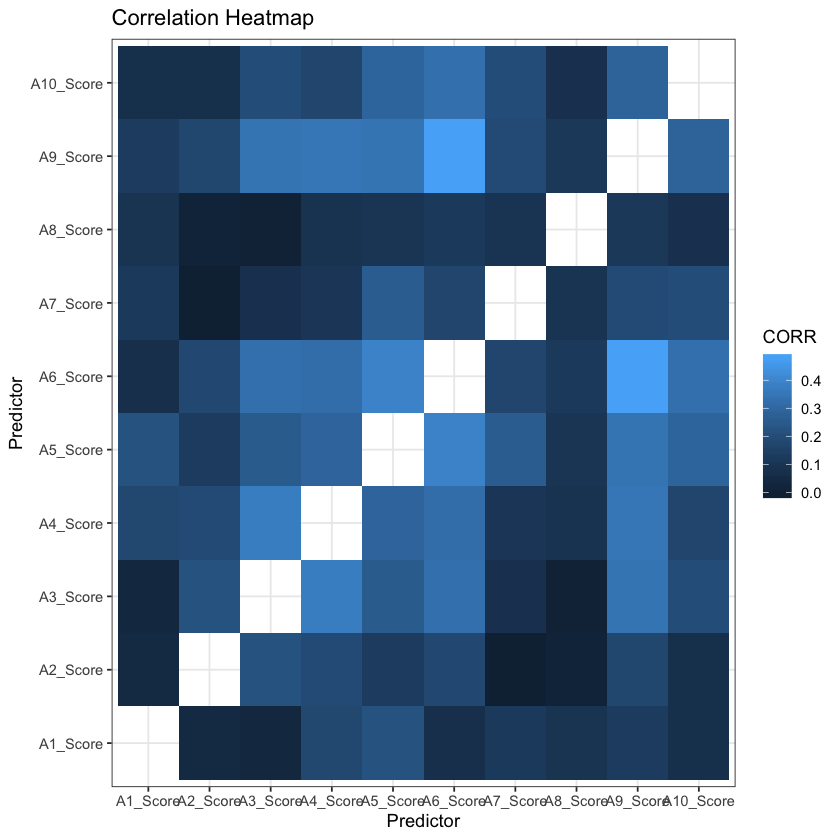

In [8]:
corr_heatmap <- df_autism  %>% 
        select(a_score)  %>% 
        cor() %>% 
        melt() %>% 
        filter(value < 1) %>% 
        ggplot(aes(x=Var1, y=Var2, fill = value))+
        geom_tile()+
        ggtitle("Correlation Heatmap")+
        xlab("Predictor")+
        ylab("Predictor")+
        labs(fill = "CORR")

corr_heatmap

ggsave("../img/01_corr_heatmap.png")

In [9]:
head(df_autism)

X1,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,⋯,gender,ethnicity,jaundice,country_of_res,used_app_before,result,age_desc,relation,Class.ASD,autism
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<chr>,<fct>,<chr>,<chr>,<dbl>,<chr>,<chr>,<fct>,<fct>
245,1,1,1,0,0,1,0,1,0,⋯,m,Middle Eastern,no,Jordan,no,6,4-11 years,Parent,no,no
393,1,0,0,1,1,1,1,1,1,⋯,f,White-European,no,United Kingdom,no,8,12-16 years,Self,yes,no
275,1,0,1,1,0,0,0,0,1,⋯,m,Asian,no,India,no,4,4-11 years,Health care professional,no,no
199,1,0,0,0,1,0,1,0,0,⋯,m,White-European,no,Australia,no,4,4-11 years,Parent,no,yes
837,1,0,1,0,0,0,0,0,0,⋯,m,White-European,no,Portugal,no,2,18 and more,Self,no,no
547,0,1,1,1,1,0,1,1,0,⋯,m,Asian,no,Vietnam,no,7,18 and more,Self,yes,no


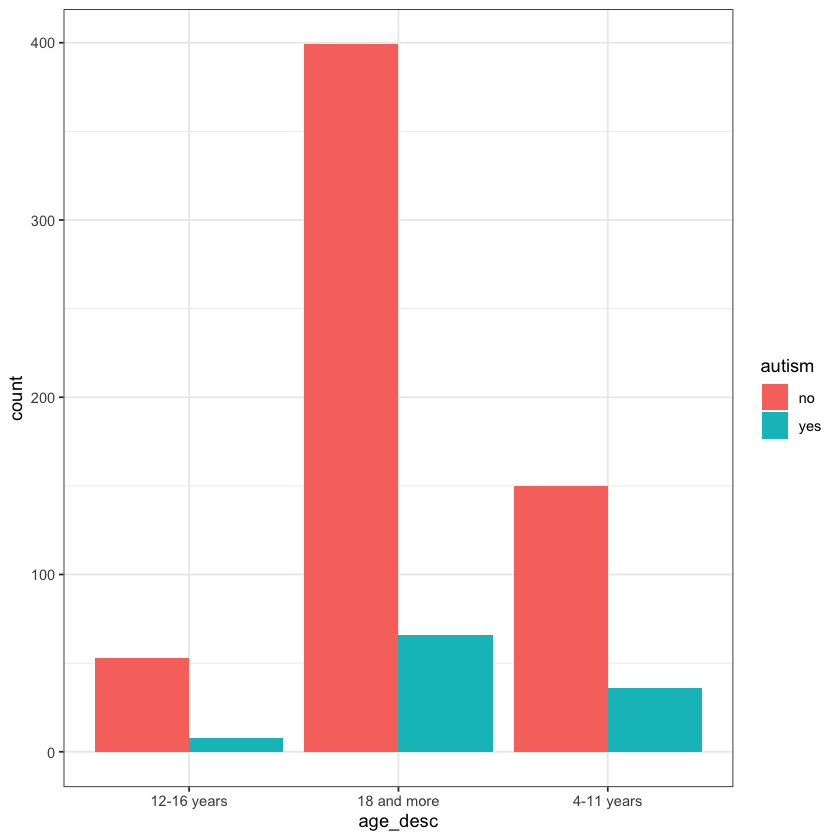

In [10]:
df_autism  %>% 
    ggplot(aes(x=age_desc, fill=autism))+
    geom_bar(stat="count", position = "dodge")

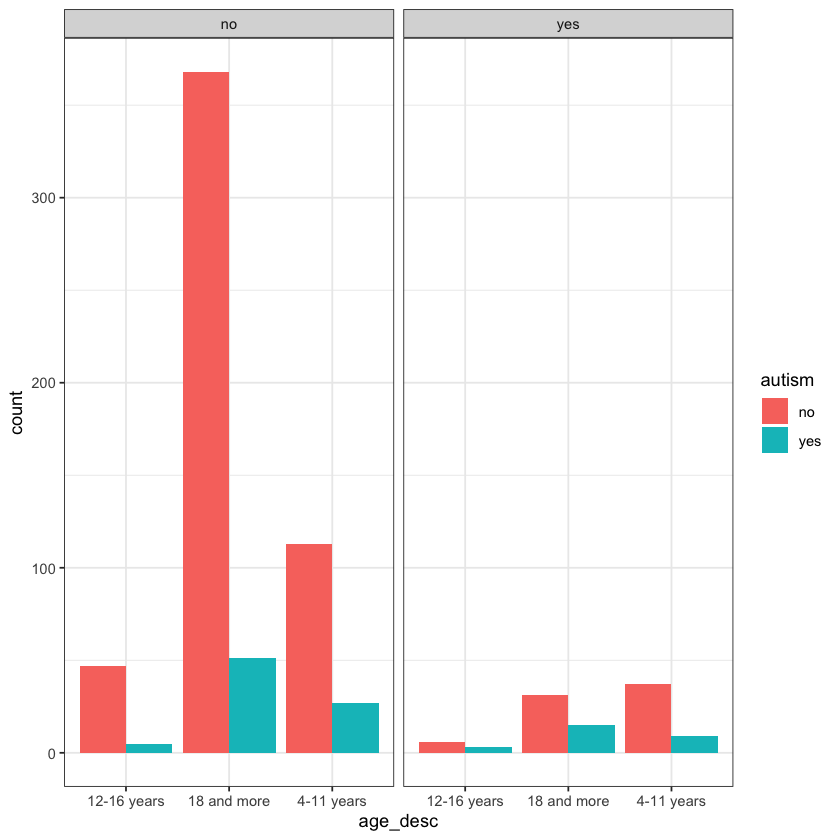

In [11]:
df_autism  %>% 
    ggplot(aes(x=age_desc, fill=autism))+
    geom_bar(stat="count", position = "dodge")+
    facet_wrap(~jaundice)

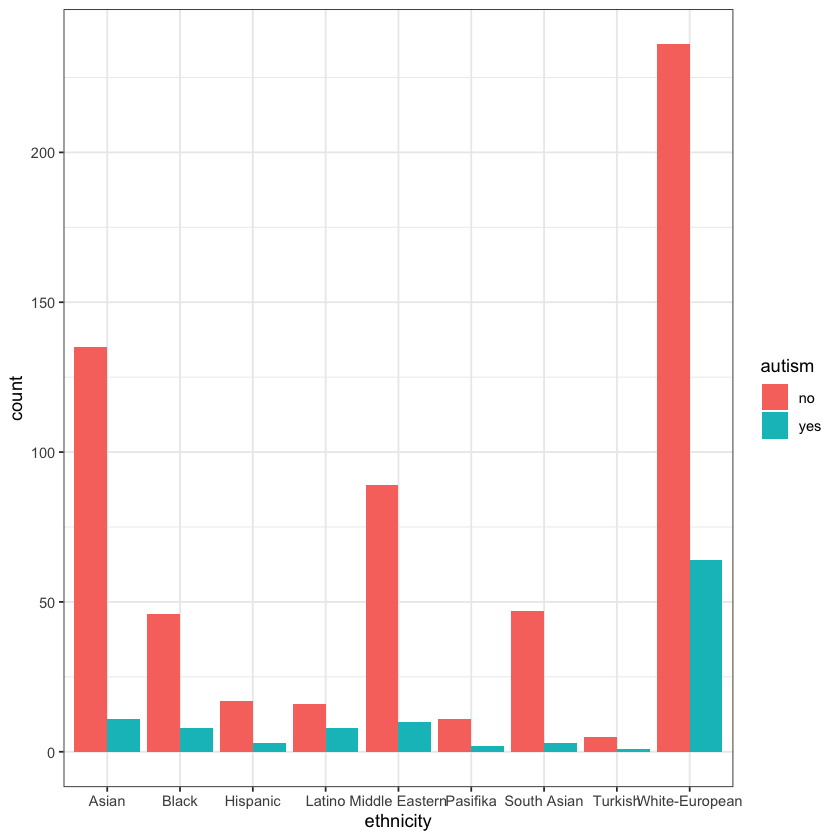

In [12]:
df_autism  %>% 
    ggplot(aes(x=ethnicity, fill=autism))+
    geom_bar(stat="count", position = "dodge")

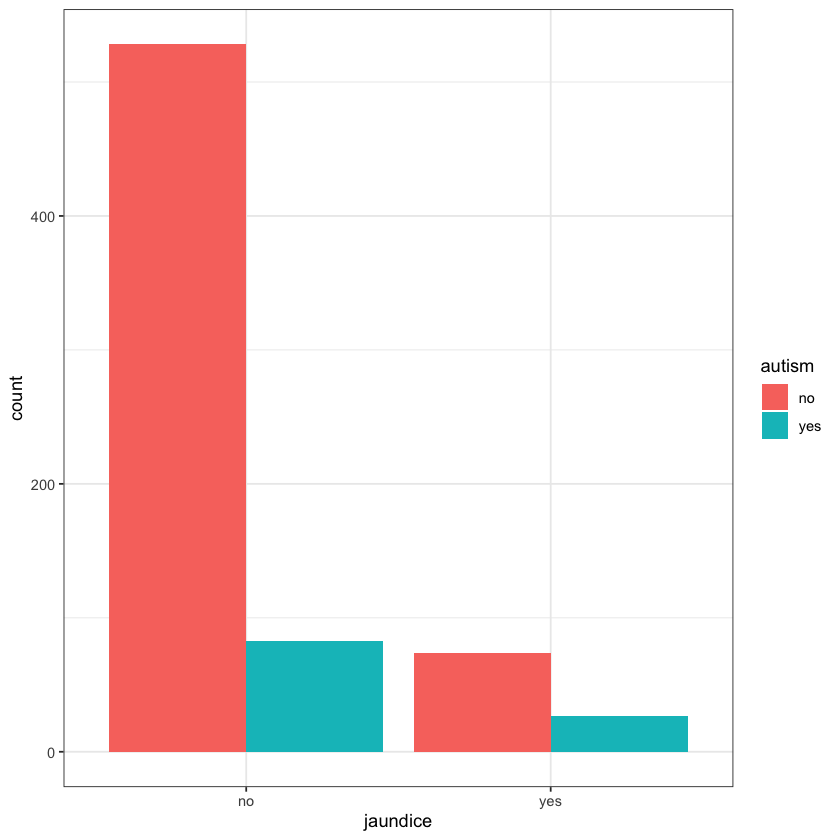

In [13]:
df_autism  %>% 
    ggplot(aes(x=jaundice, fill=autism))+
    geom_bar(stat="count", position = "dodge")

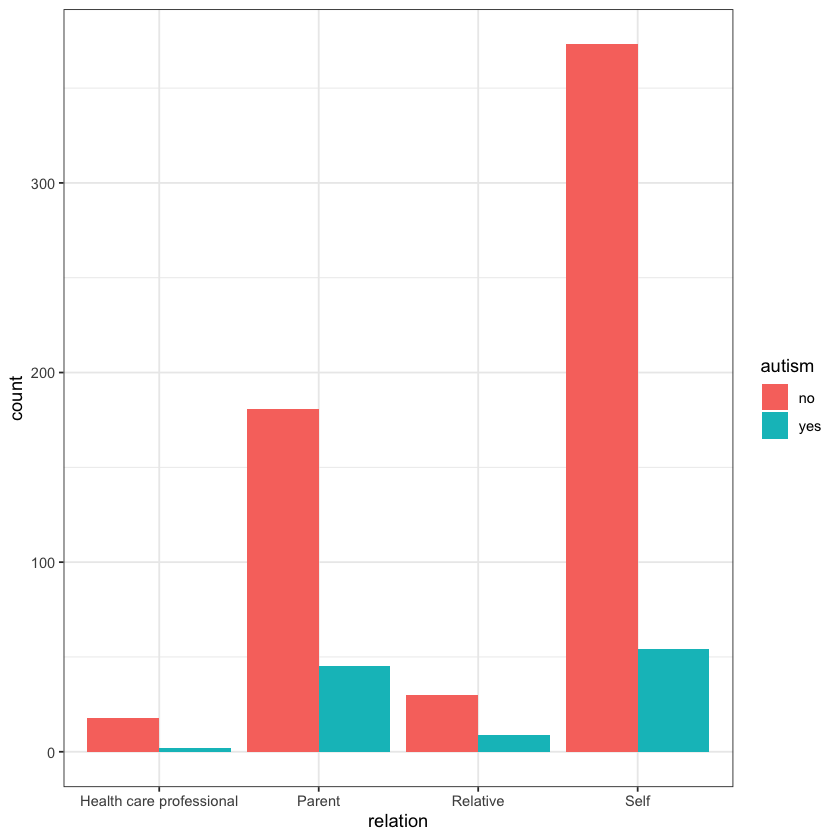

In [14]:
df_autism  %>% 
    ggplot(aes(x=relation, fill=autism))+
    geom_bar(stat="count", position = "dodge")

Saving 7 x 7 in image


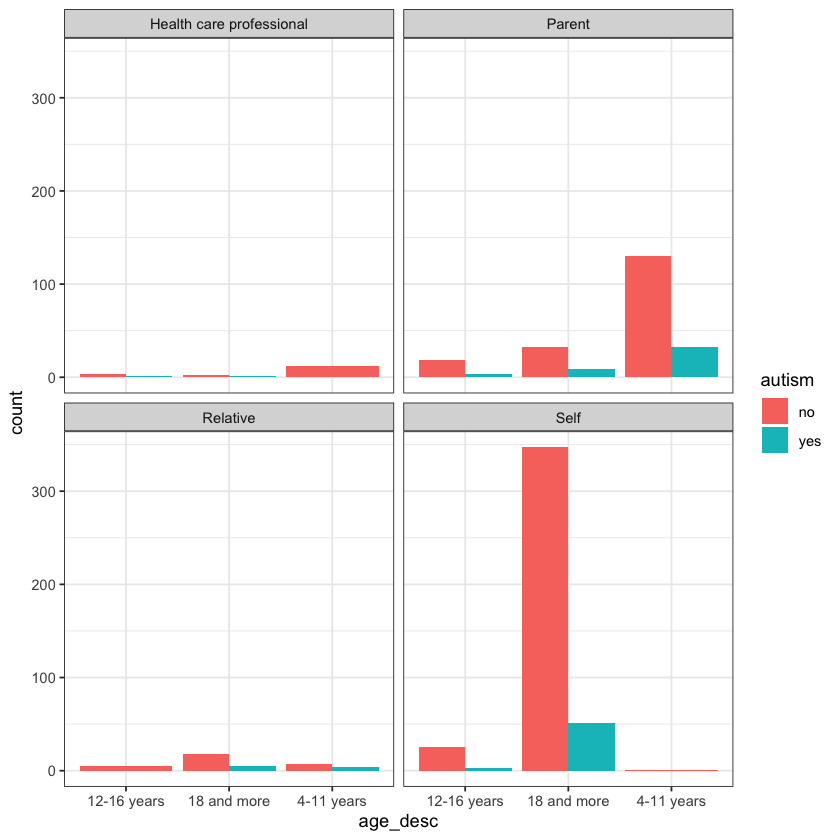

In [15]:
df_autism  %>% 
    ggplot(aes(x=age_desc, fill=autism))+
    geom_bar(stat="count", position = "dodge") +
    facet_wrap(~ relation)
ggsave("../img/03_age_relation.png")

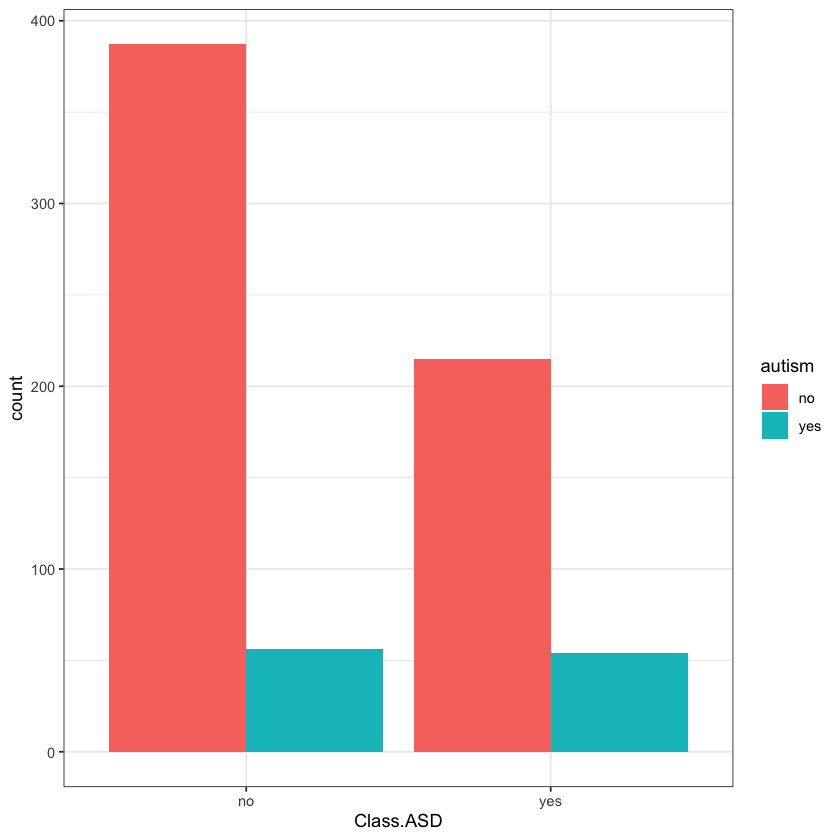

In [16]:
df_autism  %>% 
    ggplot(aes(x=Class.ASD, fill=autism))+
    geom_bar(stat="count", position = "dodge") 



In [17]:

## Function from User cybernetic at https://stackoverflow.com/questions/23891140/r-how-to-visualize-confusion-matrix-using-the-caret-package
draw_confusion_matrix <- function(cm) {
    

  layout(matrix(c(1,1,2)))
  par(mar=c(2,2,2,2))
  plot(c(100, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')
  title('CONFUSION MATRIX', cex.main=2)

  # create the matrix 
  rect(150, 430, 240, 370, col='#3F97D0')
  text(195, 435, 'ASD Diagnosed', cex=1.2)
  rect(250, 430, 340, 370, col='#F7AD50')
  text(295, 435, 'ADS-10 Result', cex=1.2)
  text(125, 370, 'Predicted', cex=1.3, srt=90, font=2)
  text(245, 450, 'Actual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col='#F7AD50')
  rect(250, 305, 340, 365, col='#3F97D0')
  text(140, 400, 'ASD Diagnosed', cex=1.2, srt=90)
  text(140, 335, 'ADS-10 Result', cex=1.2, srt=90)

  # add in the cm results 
  res <- as.numeric(cm$table)
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='white')
  text(295, 400, res[3], cex=1.6, font=2, col='white')
  text(295, 335, res[4], cex=1.6, font=2, col='white')

  # add in the specifics 
  plot(c(100, 0), c(100, 0), type = "n", xlab="", ylab="", main = "DETAILS", xaxt='n', yaxt='n')
  text(10, 85, names(cm$byClass[1]), cex=1.2, font=2)
  text(10, 70, round(as.numeric(cm$byClass[1]), 3), cex=1.2)
  text(30, 85, names(cm$byClass[2]), cex=1.2, font=2)
  text(30, 70, round(as.numeric(cm$byClass[2]), 3), cex=1.2)
  text(50, 85, names(cm$byClass[5]), cex=1.2, font=2)
  text(50, 70, round(as.numeric(cm$byClass[5]), 3), cex=1.2)
  text(70, 85, names(cm$byClass[6]), cex=1.2, font=2)
  text(70, 70, round(as.numeric(cm$byClass[6]), 3), cex=1.2)
  text(90, 85, names(cm$byClass[7]), cex=1.2, font=2)
  text(90, 70, round(as.numeric(cm$byClass[7]), 3), cex=1.2)

  # add in the accuracy information 
  text(30, 35, names(cm$overall[1]), cex=1.5, font=2)
  text(30, 20, round(as.numeric(cm$overall[1]), 3), cex=1.4)
  text(70, 35, names(cm$overall[2]), cex=1.5, font=2)
  text(70, 20, round(as.numeric(cm$overall[2]), 3), cex=1.4)
}  

Saving 7 x 7 in image


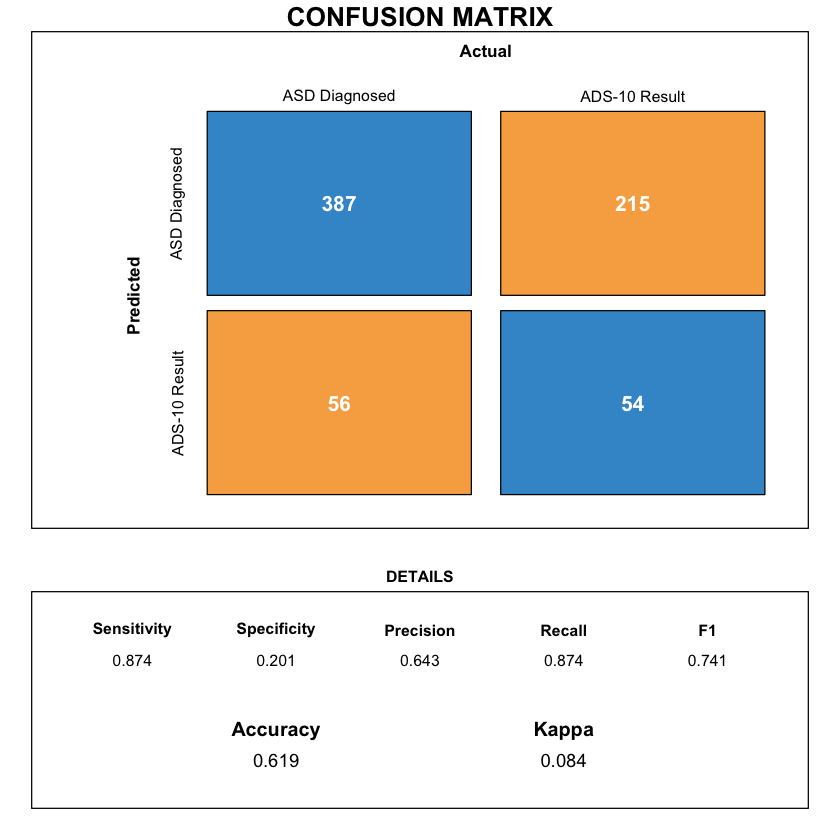

In [18]:
numLlvs <- 2
cm <- confusionMatrix(
   df_autism$autism,
   df_autism$Class.ASD)  

plot <- draw_confusion_matrix(cm)
ggsave(plot = draw_confusion_matrix(cm), "../img/02_confusion_matrix_info.png")

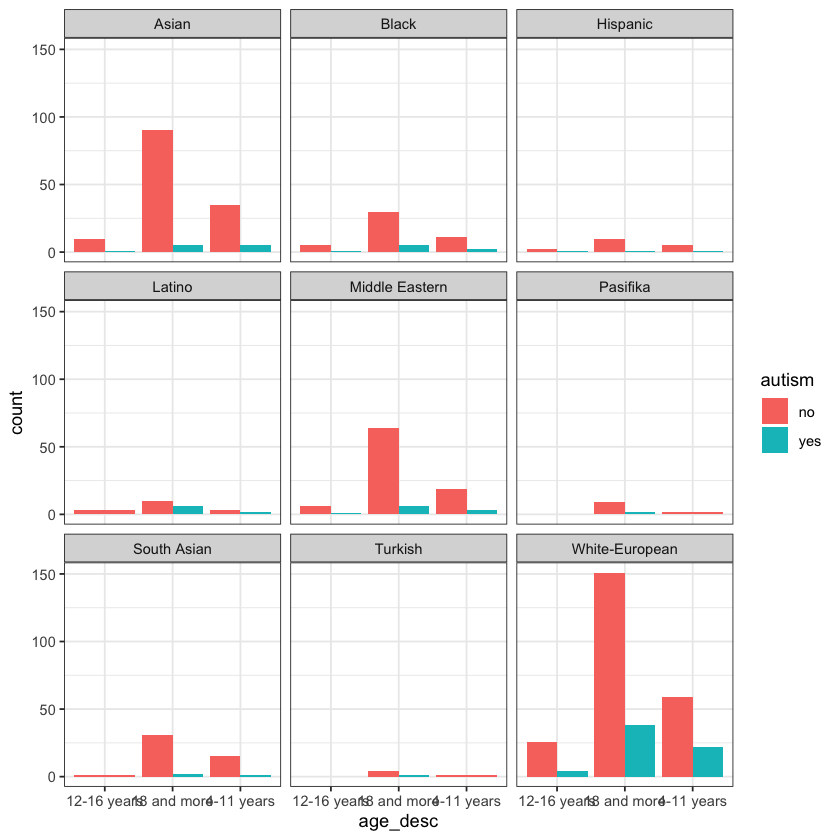

In [19]:
df_autism  %>% 
    ggplot(aes(x=age_desc, fill=autism))+
    geom_bar(stat="count", position = "dodge")+
    facet_wrap(~ethnicity)

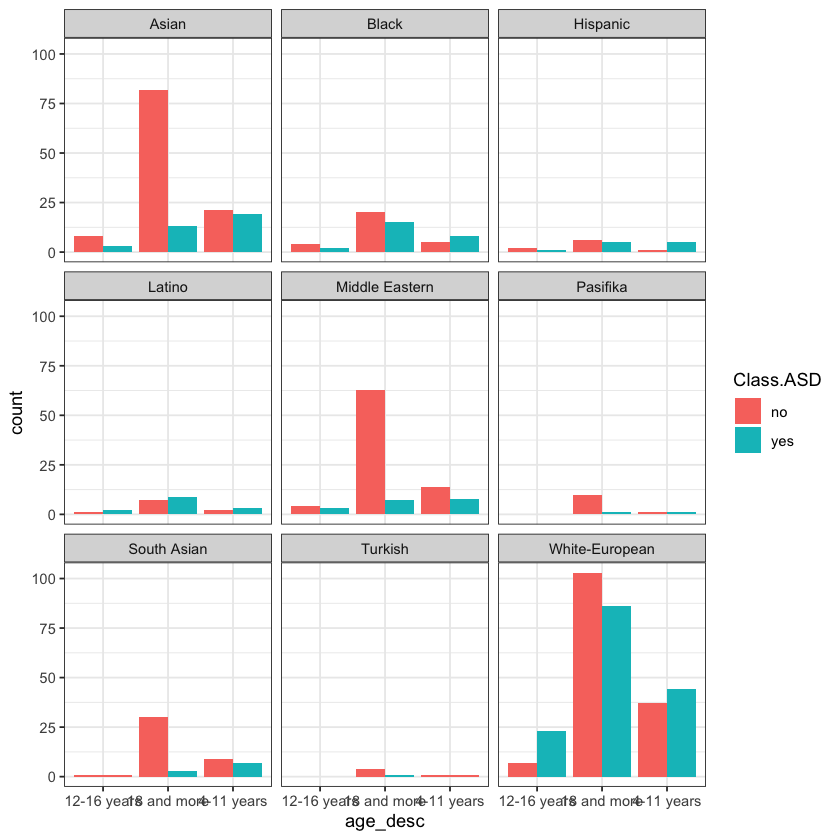

In [20]:
df_autism  %>% 
    ggplot(aes(x=age_desc, fill=Class.ASD))+
    geom_bar(stat="count", position = "dodge")+
    facet_wrap(~ethnicity)

Saving 7 x 7 in image


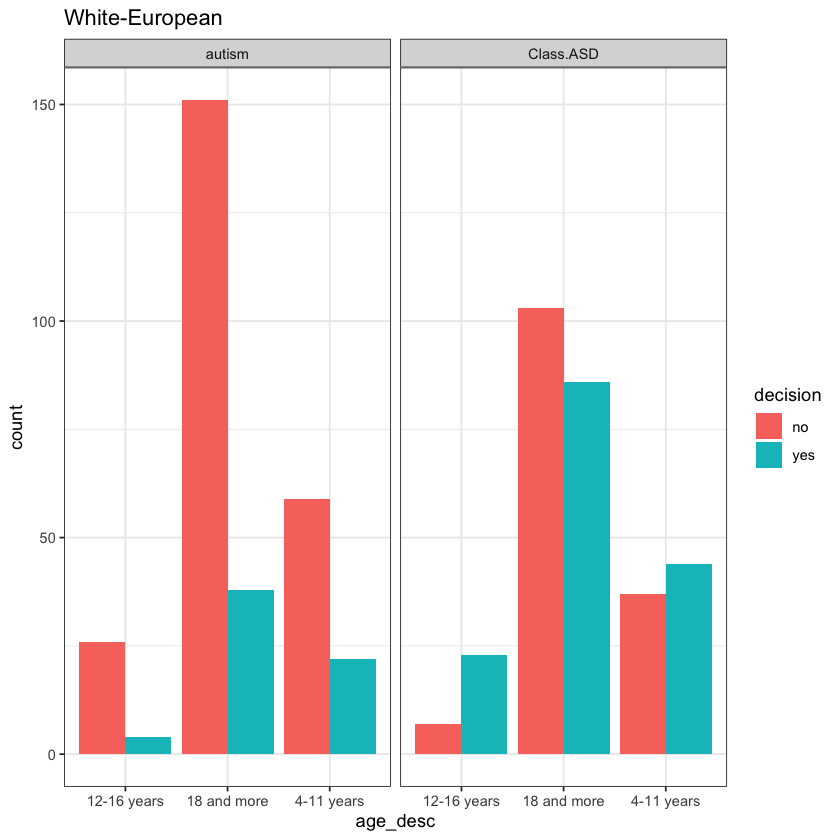

In [21]:
df_autism  %>%
    filter(ethnicity == "White-European") %>% 
    select(Class.ASD, autism, age_desc) %>%
    gather("type", "decision", -age_desc) %>% 
    ggplot(aes(x=age_desc, fill=decision))+
    geom_bar(stat="count", position = "dodge")+ 
    facet_wrap(~type)+
    ggtitle("White-European")

ggsave("../img/04_white_misclass.png")

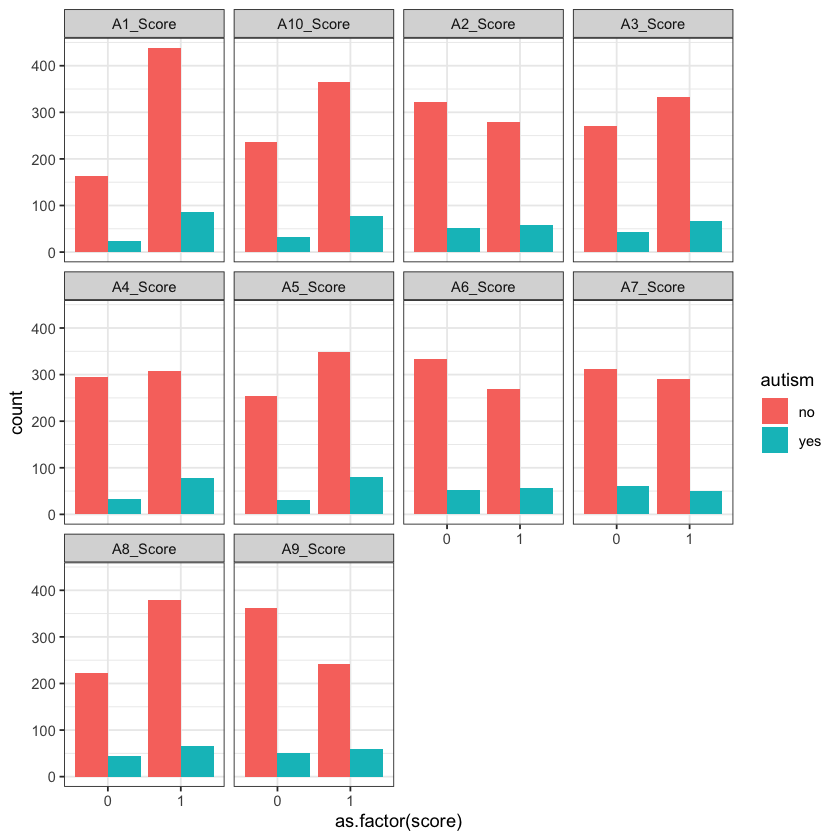

In [48]:
df_autism  %>%
    select(autism, a_score) %>%
    gather("test", "score", -autism) %>%
    ggplot(aes(x=as.factor(score), fill = autism))+
    geom_bar(stat="count", position = "dodge") +
    facet_wrap(~test)

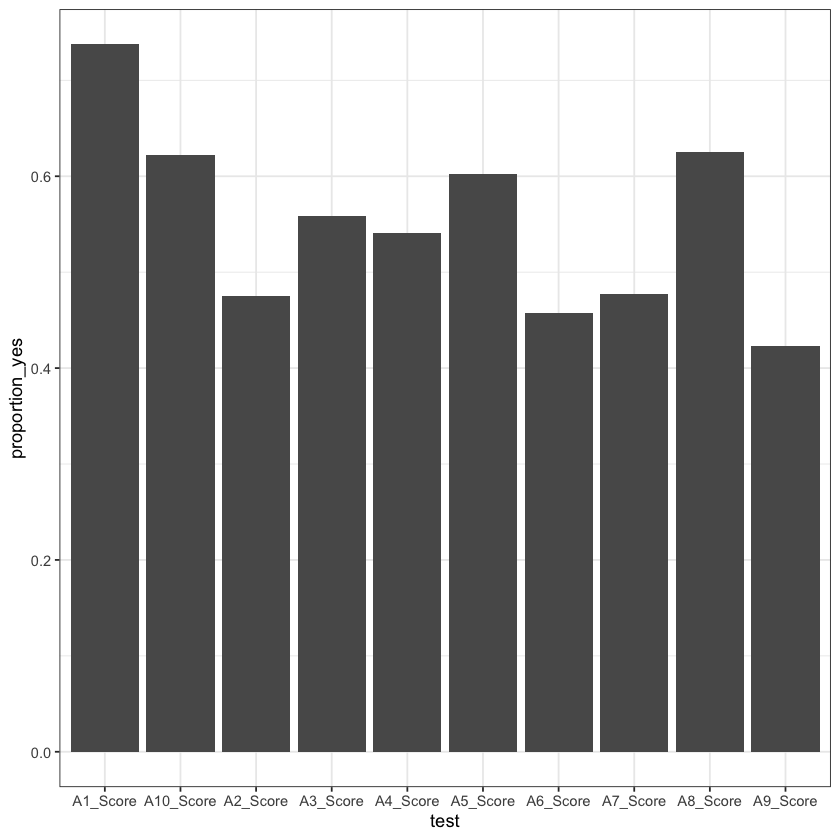

In [71]:
df_autism  %>%
    select(a_score) %>%
    gather("test", "score") %>%
#     filter(score  == 1) %>%
    group_by(test) %>% 
    summarise(proportion_yes = mean(score)) %>% 
    ggplot(aes(x=test, y=proportion_yes))+
    geom_bar(stat = "identity")
    

In [72]:
head(df_autism)

X1,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,⋯,gender,ethnicity,jaundice,country_of_res,used_app_before,result,age_desc,relation,Class.ASD,autism
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<chr>,<fct>,<chr>,<chr>,<dbl>,<chr>,<chr>,<fct>,<fct>
245,1,1,1,0,0,1,0,1,0,⋯,m,Middle Eastern,no,Jordan,no,6,4-11 years,Parent,no,no
393,1,0,0,1,1,1,1,1,1,⋯,f,White-European,no,United Kingdom,no,8,12-16 years,Self,yes,no
275,1,0,1,1,0,0,0,0,1,⋯,m,Asian,no,India,no,4,4-11 years,Health care professional,no,no
199,1,0,0,0,1,0,1,0,0,⋯,m,White-European,no,Australia,no,4,4-11 years,Parent,no,yes
837,1,0,1,0,0,0,0,0,0,⋯,m,White-European,no,Portugal,no,2,18 and more,Self,no,no
547,0,1,1,1,1,0,1,1,0,⋯,m,Asian,no,Vietnam,no,7,18 and more,Self,yes,no


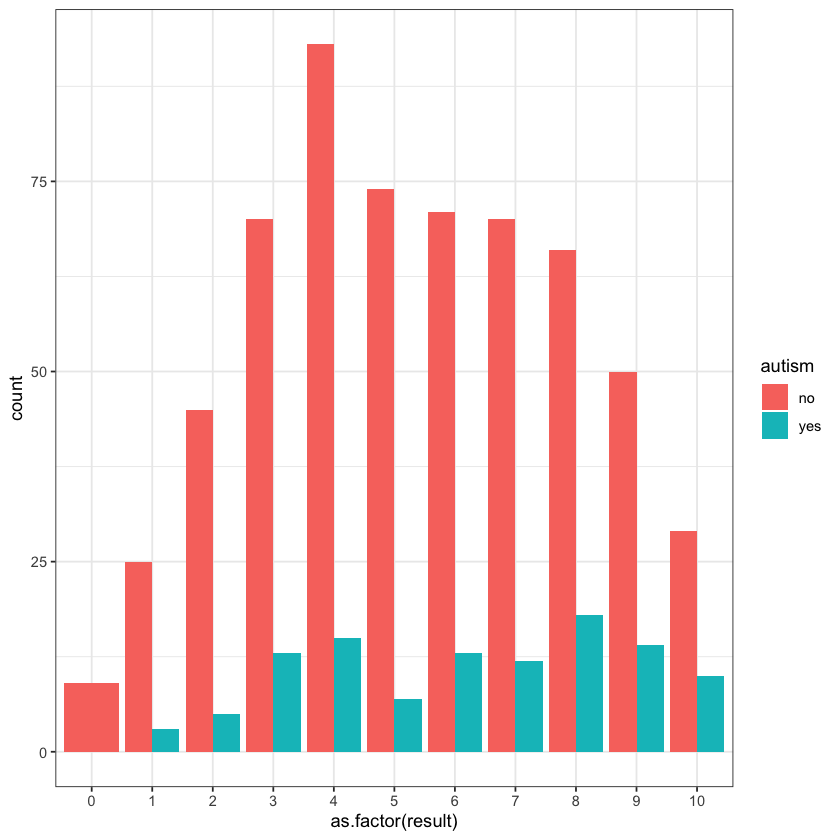

In [82]:
df_autism  %>% 
    ggplot(aes(x=as.factor(result), fill=autism))+
    geom_bar(stat="count", position="dodge")

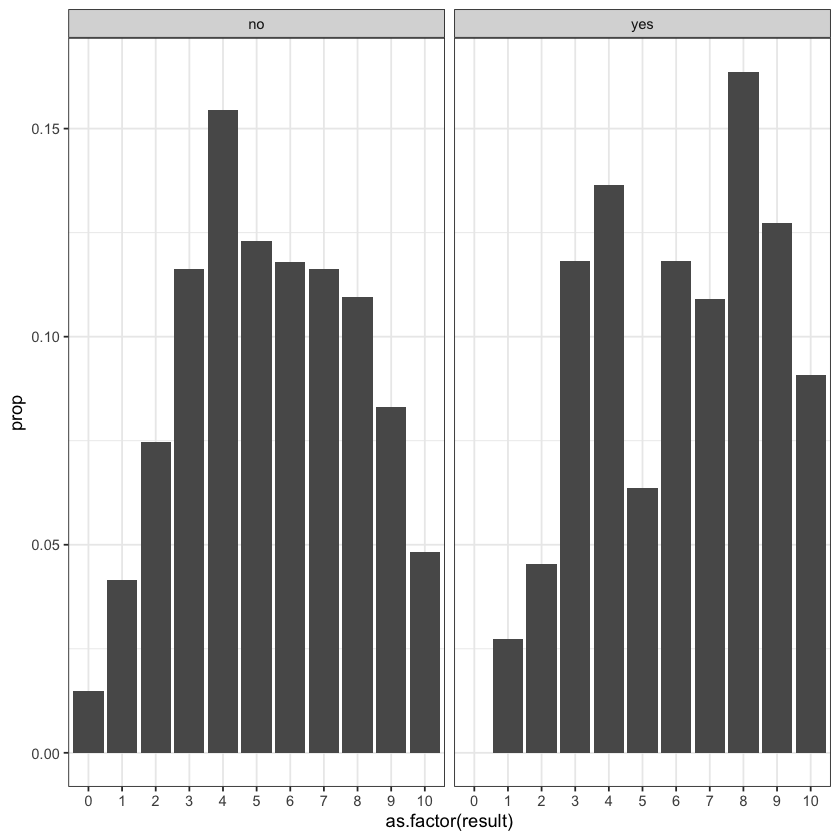

In [107]:
df_autism  %>% 
    ggplot()+
    geom_bar(mapping = aes(x=as.factor(result), y = ..prop.., group = 1))+
    facet_wrap(~autism)

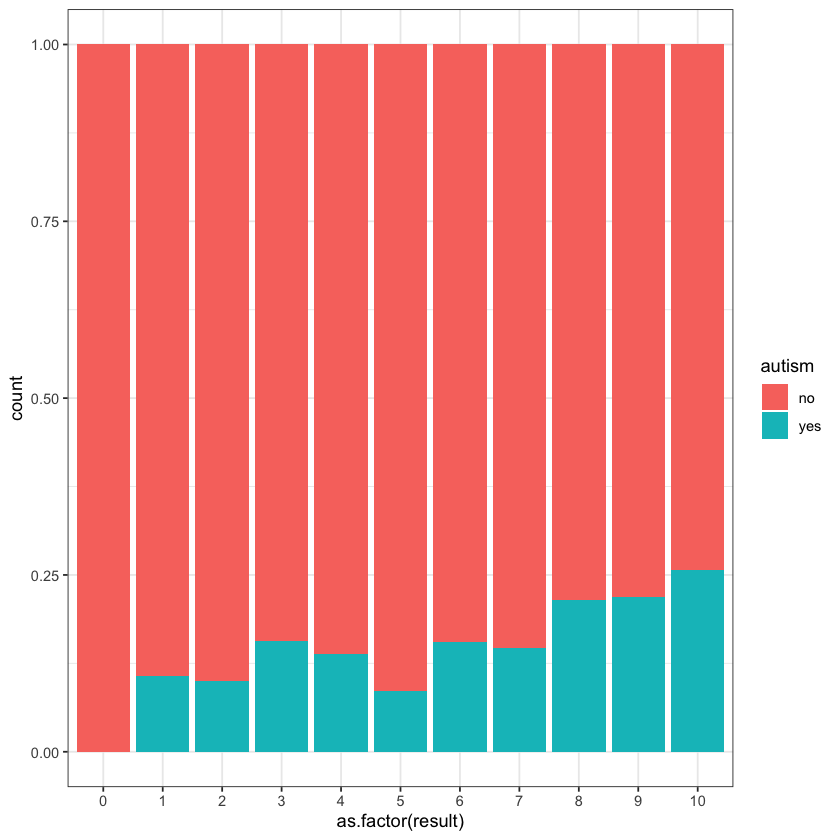

In [108]:
df_autism  %>% 
    ggplot()+
    geom_bar(mapping = aes(x=as.factor(result), fill = autism),
             position = "fill")

Warning message:
“Ignoring unknown parameters: bin”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


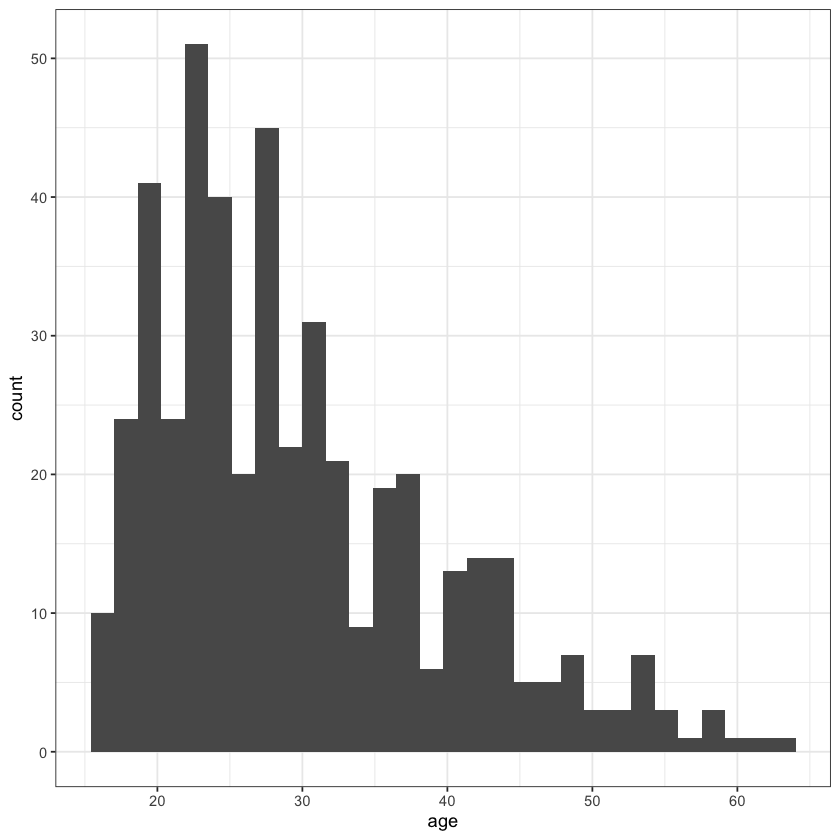

In [126]:
df_autism  %>%
    filter(age_desc == '18 and more' & age < 100)  %>% 
    ggplot(aes(x=age))+ 
    geom_histogram(bin=5)
    